In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Univariate Chart Plot
##### This code is used to create univariate chart of one independent variable against a target variable by line chart. Meanwhile, it will also show the number of observations falls into each independent variable bucket by bar chart

In [5]:
def create_bin(input_df, bins=20):
    
# Parameter Instruction
    # input_df: Pandas dataframe format with one independent variable column (labeled 'var') and one target column (labeled 'target')
    # bins: Optional, number of bins in the univariate chart
    
    # Outputs:
    # target_means: Series with the average value of 'target' by evenly-spaced 'var' bins
    # bin_centers: List of the centers of those variable bin
    
    binned, edges = pd.cut(input_df['var'], bins, retbins = True)
    grouped_data = input_df.groupby(binned)['target']
    target_means = grouped_data.mean().fillna(0)  # ------------------ to avoid empty bucket
    bin_centers = (edges[:-1] + edges[1:])/2
    return target_means, bin_centers


def plot_line_hist(target_means, bin_centers, series, title, bins=20):
    
# Parameter Instruction
    # target_means: Series with average target values
    # bin_centers: List of bin centers
    # series: Pandas series for which to create a histogram
    # title: Chart title
    # bins: Number of bins for the histogram and line plot
    
    fig, ax1 = plt.subplots(figsize=(8,5))
    ax1.yaxis.tick_right()
    ax1.plot(bin_centers, target_means, '-')
    
    ax2 = ax1.twinx()  # ----------- generate a second plotted object (e.g. histogram) by calling the .twinx() method of ax1.
    ax2.hist(series, bins, alpha=0.2, histtype='step', fill = True)
    ax2.grid(b = False)
    plt.xlim([series.min(), series.max()])
    
    ax1.set_ylabel('Target rate', fontsize=15)
    ax1.set_xlabel('Feature values', fontsize=15)
    ax2.set_ylabel('No. of counts', fontsize=15)
    plt.title(title, fontsize=15)
    
    
def univariate_plot(var, target, title, bins=20):
    
# Parameter Instruction
    # var: Pandas series or dataframe containing the variable against which to plot target and for which to plot histogram
    # target: Pandas series or dataframe containing target values
    # bins: Number of bins over which to discretize var

    input_df = pd.DataFrame({'var': var, 'target': target})
    all_inf_or_nan = input_df.isin([np.inf, np.nan])
    input_df = input_df[~all_inf_or_nan]
    input_df = input_df.fillna(0)
    target_means, bin_centers = create_bin(input_df, bins = bins)
    plot_line_hist(target_means, bin_centers, input_df['var'], title, bins = bins)

##### Example

In [3]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(low=0, high=10, size=(100,2)),
                 columns = ['Independent_Variable (X)', 'Target_Variable (Y)'])
df.head()

,Independent_Variable (X),Target_Variable (Y)
0,5,8
1,9,5
2,0,0
3,1,7
4,6,9


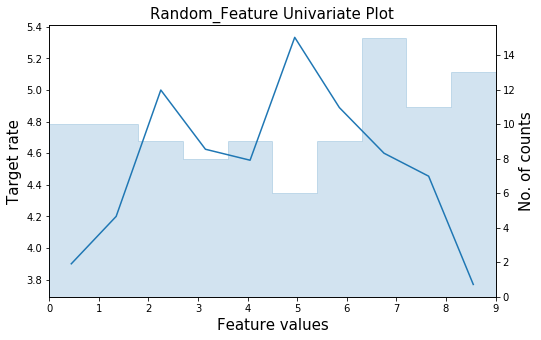

In [7]:
var = df['Independent_Variable (X)']
target = df['Target_Variable (Y)']
univariate_plot(var = var
               ,target = target
               ,title = 'Random_Feature Univariate Plot'
               ,bins = 10)